# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [5]:
train.shape,test.shape

((7500, 11), (7500, 10))

# 데이터 확인하기

In [6]:
train.columns, test.columns

(Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
        'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
        'Age', 'Calories_Burned'],
       dtype='object'),
 Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
        'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
        'Age'],
       dtype='object'))

In [7]:
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


In [8]:
test.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,Normal Weight,F,45
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,Overweight,M,21
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,Normal Weight,M,58
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,Overweight,M,35
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,Normal Weight,F,67


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 586.1+ KB


In [11]:
# 결측치확인하기
train.isna().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [12]:
test.isna().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
dtype: int64

In [13]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [14]:
test.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.560000,104.058200,95.538933,5.247067,5.714933,165.187413,42.943600
std,8.283402,1.391966,9.579919,0.554436,3.510078,32.986667,17.076529
min,1.000000,99.000000,67.000000,4.000000,0.000000,83.800000,20.000000
25%,8.000000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000
50%,16.000000,104.400000,96.000000,5.000000,5.000000,163.100000,40.000000
75%,23.000000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000
max,30.000000,106.700000,123.000000,7.000000,12.000000,282.200000,79.000000


# 컬럼들 변경하기

In [15]:
train_test = [train,test]
train_test

[              ID  Exercise_Duration  Body_Temperature(F)    BPM  Height(Feet)  \
 0     TRAIN_0000               26.0                105.6  107.0           5.0   
 1     TRAIN_0001                7.0                103.3   88.0           6.0   
 2     TRAIN_0002                7.0                103.3   86.0           6.0   
 3     TRAIN_0003               17.0                104.0   99.0           5.0   
 4     TRAIN_0004                9.0                102.7   88.0           5.0   
 ...          ...                ...                  ...    ...           ...   
 7495  TRAIN_7495               22.0                105.1  104.0           4.0   
 7496  TRAIN_7496               20.0                105.3  104.0           5.0   
 7497  TRAIN_7497                8.0                103.1   90.0           6.0   
 7498  TRAIN_7498               12.0                104.4   97.0           5.0   
 7499  TRAIN_7499               16.0                104.9   91.0           5.0   
 
       Height(

In [16]:
train.columns, test.columns

(Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
        'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
        'Age', 'Calories_Burned'],
       dtype='object'),
 Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
        'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
        'Age'],
       dtype='object'))

In [17]:
# 온도 화씨 -> 섭씨 함수
def fahrenheit_to_celsius(f):
    c = (f - 32) * 5/9
    return c

# 신장 컬럼을 하나로 만들기 위해 feet, inch를 cm로 변환하는 함수
def feet_inch_to_cm(feet, inch):
    cm = feet * 30.48 + inch * 2.54
    return cm

# 파운드를 kg으로 변환하는 함수
def pounds_to_kg(lb):
    kg = lb * 0.453592
    return kg

In [18]:
for df in train_test:
    df['Body_Temperature'] = df['Body_Temperature(F)'].apply(fahrenheit_to_celsius)
    

In [19]:
for df in train_test:
    df['Height'] = df.apply(lambda x: feet_inch_to_cm(x['Height(Feet)'],x['Height(Remainder_Inches)']), axis = 1)

In [20]:
for df in train_test:
    df['Weight'] = df['Weight(lb)'].apply(pounds_to_kg)

In [21]:
# 변환 이전의 컬럼은 drop!
drop_col = ['Body_Temperature(F)','Height(Feet)','Height(Remainder_Inches)','Weight(lb)']

In [22]:
# inplace를 꼭써야 하나? why?
for df in train_test:
    df = df.drop(columns=drop_col,inplace = True)

In [23]:
train

,ID,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Body_Temperature,Height,Weight
0,TRAIN_0000,26.0,107.0,Normal Weight,F,45,166.0,40.888889,175.26,69.989246
1,TRAIN_0001,7.0,88.0,Overweight,M,50,33.0,39.611111,198.12,102.012841
2,TRAIN_0002,7.0,86.0,Overweight,M,29,23.0,39.611111,190.50,99.019134
3,TRAIN_0003,17.0,99.0,Normal Weight,F,33,91.0,40.000000,167.64,66.995538
4,TRAIN_0004,9.0,88.0,Normal Weight,M,38,32.0,39.277778,177.80,77.019922
...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,104.0,Normal Weight,F,75,151.0,40.611111,147.32,50.983741
7496,TRAIN_7496,20.0,104.0,Normal Weight,F,21,114.0,40.722222,172.72,66.995538
7497,TRAIN_7497,8.0,90.0,Overweight,M,57,41.0,39.500000,187.96,91.988458
7498,TRAIN_7498,12.0,97.0,Overweight,M,35,57.0,40.222222,175.26,76.022019


In [24]:
# 기술 통계량 확인
train.describe()

,Exercise_Duration,BPM,Age,Calories_Burned,Body_Temperature,Height,Weight
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,95.498133,42.636000,89.373467,40.018652,174.506128,75.006511
std,8.3553,9.587331,16.883188,62.817086,0.784914,14.318365,15.108304
min,1.0000,69.000000,20.000000,1.000000,37.111111,121.920000,36.015205
25%,8.0000,88.000000,28.000000,35.000000,39.611111,165.100000,63.003929
50%,15.0000,95.000000,39.000000,77.000000,40.222222,175.260000,73.980855
75%,23.0000,103.000000,56.000000,138.000000,40.611111,185.420000,86.998946
max,30.0000,128.000000,79.000000,300.000000,41.500000,218.440000,131.995272


In [25]:
test.describe()

,Exercise_Duration,BPM,Age,Body_Temperature,Height,Weight
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.560000,95.538933,42.943600,40.032333,174.446523,74.927689
std,8.283402,9.579919,17.076529,0.773314,14.223519,14.962488
min,1.000000,67.000000,20.000000,37.222222,132.080000,38.011010
25%,8.000000,88.000000,28.000000,39.611111,165.100000,63.003929
50%,16.000000,96.000000,40.000000,40.222222,175.260000,73.980855
75%,23.000000,103.000000,56.000000,40.611111,185.420000,86.998946
max,30.000000,123.000000,79.000000,41.500000,220.980000,128.003662


array([[<Axes: title={'center': 'Exercise_Duration'}>,
        <Axes: title={'center': 'BPM'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Calories_Burned'}>,
        <Axes: title={'center': 'Body_Temperature'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

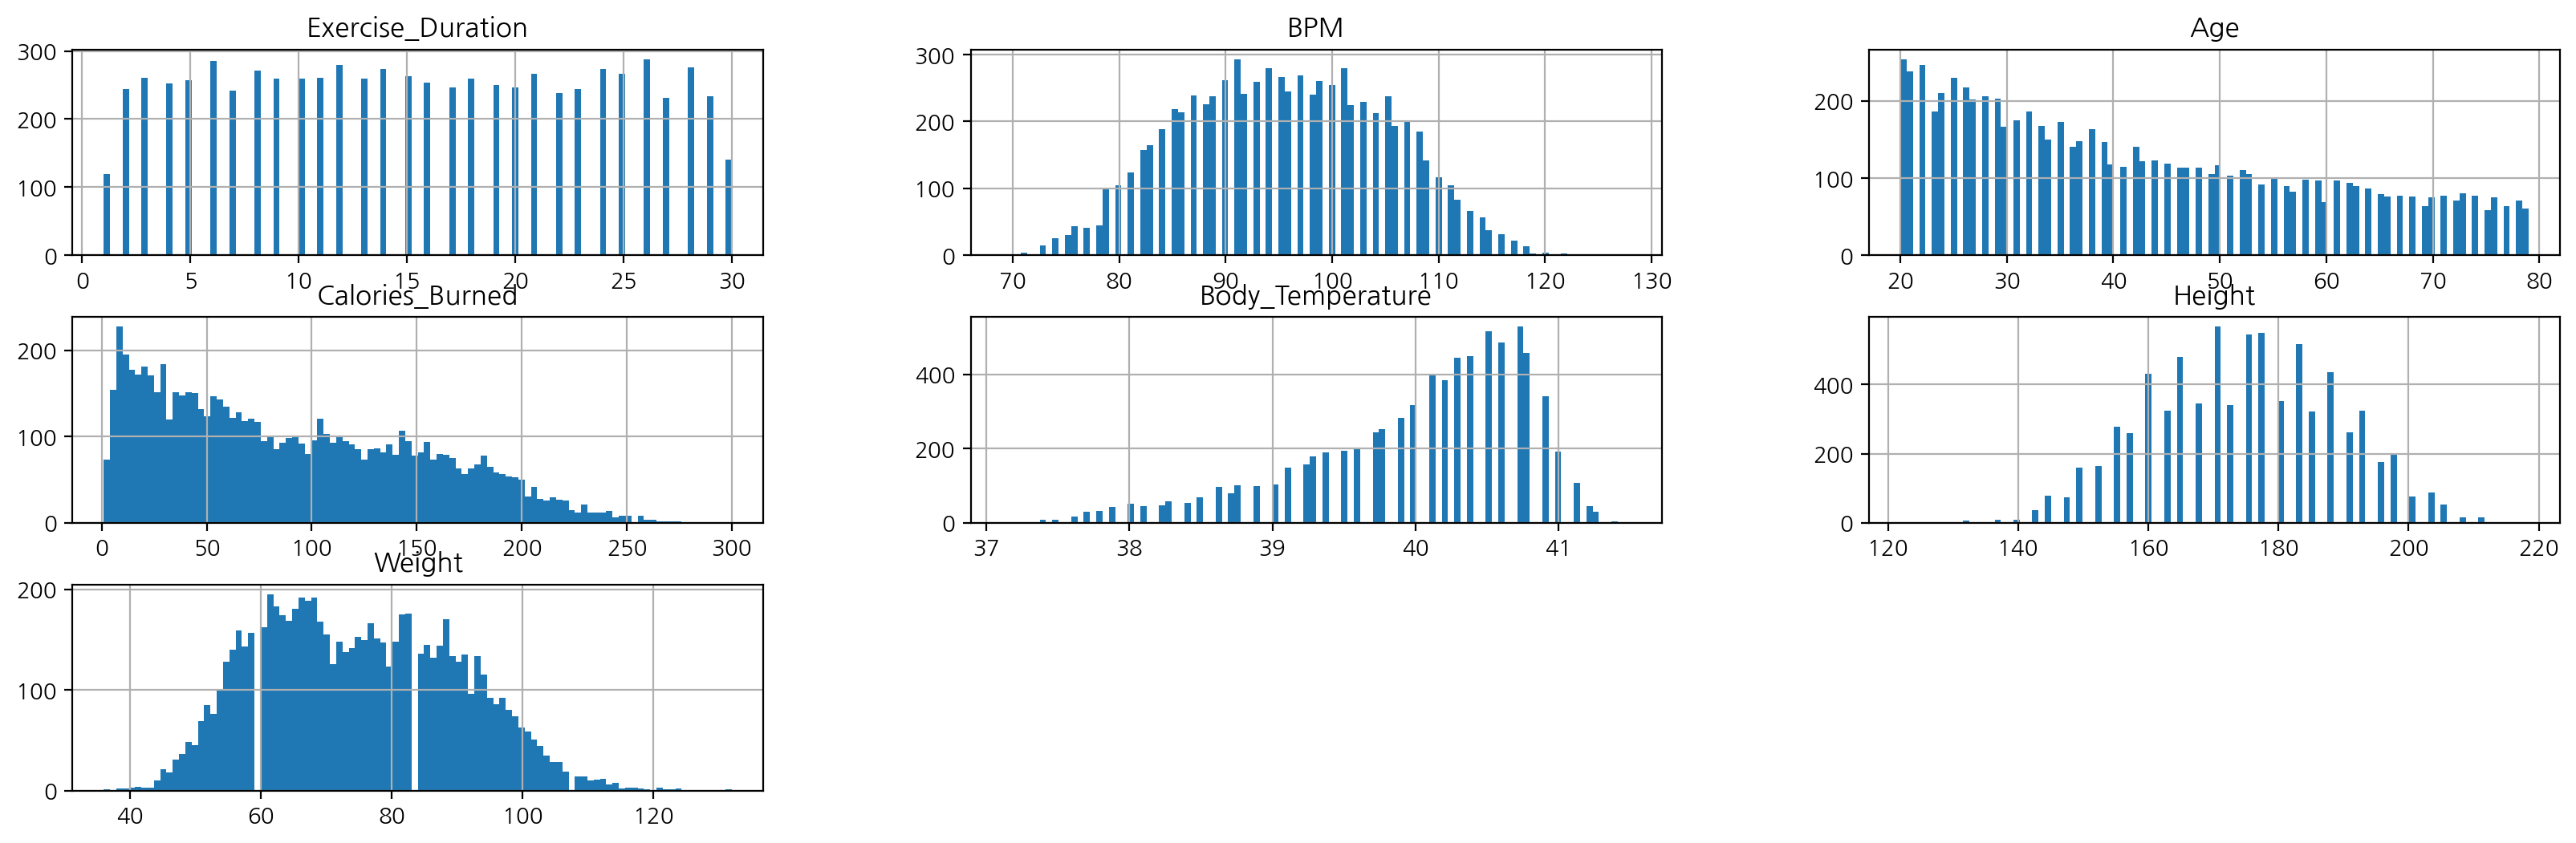

In [26]:
# 히스토그램 확인하기
train.hist(figsize=(20,6), bins = 100)

In [27]:
# 상관관계 확인하기
train.corr().style.background_gradient()

<ipython-input-27-60e2337da2af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().style.background_gradient()


,Exercise_Duration,BPM,Age,Calories_Burned,Body_Temperature,Height,Weight
Exercise_Duration,1.000000,0.853489,0.017734,0.954783,0.904314,-0.003146,0.002236
BPM,0.853489,1.000000,0.014702,0.899900,0.770707,0.006319,0.012562
Age,0.017734,0.014702,1.000000,0.159624,0.016474,0.011184,0.090536
Calories_Burned,0.954783,0.899900,0.159624,1.000000,0.824379,0.021906,0.042568
Body_Temperature,0.904314,0.770707,0.016474,0.824379,1.000000,0.002979,0.007554
Height,-0.003146,0.006319,0.011184,0.021906,0.002979,1.000000,0.957816
Weight,0.002236,0.012562,0.090536,0.042568,0.007554,0.957816,1.000000


In [28]:
# 다중공선성 확인하기
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수 분리
X = train[['Exercise_Duration', 'BPM', 'Body_Temperature', 'Height', 'Weight']]

# VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor           features
0    13.840548  Exercise_Duration
1   362.002699                BPM
2   961.217016   Body_Temperature
3  1728.904449             Height
4   298.661792             Weight


오늘 알게된 내용

컬럼(피처) - 미국식 표기법으로 되어있었다 -> 한국식으로 바꿈

각 변수간의 상관관계를 확인해보았다.

칼로리 소모량(목표변수)
    - 높은 상관관계 : 운동시간(0.954783), 심박수(0.899900), 체온(0.824379)
    - 낮은 상관관계 : 신장(0.021906), 체중(0.042568), 나이(0.159624)
        
다중공선성(VIF)
    - 10이상의 매우 높은 값들 : 체온과 심박수 -  136.019228
                           신장과 체중 - 66.871604
    

In [29]:
train.columns, test.columns

(Index(['ID', 'Exercise_Duration', 'BPM', 'Weight_Status', 'Gender', 'Age',
        'Calories_Burned', 'Body_Temperature', 'Height', 'Weight'],
       dtype='object'),
 Index(['ID', 'Exercise_Duration', 'BPM', 'Weight_Status', 'Gender', 'Age',
        'Body_Temperature', 'Height', 'Weight'],
       dtype='object'))

In [30]:
# 파생변수 만들기
train['BMI'] = train['Weight'] /( train['Height'] / 100)**2
test['BMI'] = test['Weight'] /( test['Height'] / 100)**2

In [31]:
train

,ID,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Body_Temperature,Height,Weight
0,TRAIN_0000,26.0,107.0,Normal Weight,F,45,166.0,40.888889,175.26,69.989246
1,TRAIN_0001,7.0,88.0,Overweight,M,50,33.0,39.611111,198.12,102.012841
2,TRAIN_0002,7.0,86.0,Overweight,M,29,23.0,39.611111,190.50,99.019134
3,TRAIN_0003,17.0,99.0,Normal Weight,F,33,91.0,40.000000,167.64,66.995538
4,TRAIN_0004,9.0,88.0,Normal Weight,M,38,32.0,39.277778,177.80,77.019922
...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,104.0,Normal Weight,F,75,151.0,40.611111,147.32,50.983741
7496,TRAIN_7496,20.0,104.0,Normal Weight,F,21,114.0,40.722222,172.72,66.995538
7497,TRAIN_7497,8.0,90.0,Overweight,M,57,41.0,39.500000,187.96,91.988458
7498,TRAIN_7498,12.0,97.0,Overweight,M,35,57.0,40.222222,175.26,76.022019


In [32]:
# 카디오 효율성 지수 :  CEI = 심박수 / 체온입니다. CEI가 높을수록 운동 효율성이 높다
train['CEI'] = train['BPM'] / train['Body_Temperature']
test['CEI'] = test['BPM'] / test['Body_Temperature']

In [33]:
# 변환에 사용한 컬럼들 삭제
for df in train_test:
    df = df.drop(columns=['BPM', 'Body_Temperature', 'Height','Weight'],inplace=True)

In [35]:
# 

PCA(n_components=4)

In [37]:
train

,ID,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Body_Temperature,Height,Weight,Height_scaled,Weight_scaled,BPM_scaled,Body_Temperature_scaled
0,TRAIN_0000,26.0,107.0,Normal Weight,F,45,166.0,40.888889,175.26,69.989246,0.052654,-0.332109,1.199774,1.108778
1,TRAIN_0001,7.0,88.0,Overweight,M,50,33.0,39.611111,198.12,102.012841,1.649312,1.787635,-0.782140,-0.519252
2,TRAIN_0002,7.0,86.0,Overweight,M,29,23.0,39.611111,190.50,99.019134,1.117092,1.589472,-0.990762,-0.519252
3,TRAIN_0003,17.0,99.0,Normal Weight,F,33,91.0,40.000000,167.64,66.995538,-0.479565,-0.530272,0.365284,-0.023765
4,TRAIN_0004,9.0,88.0,Normal Weight,M,38,32.0,39.277778,177.80,77.019922,0.230061,0.133274,-0.782140,-0.943955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,104.0,Normal Weight,F,75,151.0,40.611111,147.32,50.983741,-1.898816,-1.590144,0.886840,0.754858
7496,TRAIN_7496,20.0,104.0,Normal Weight,F,21,114.0,40.722222,172.72,66.995538,-0.124752,-0.530272,0.886840,0.896426
7497,TRAIN_7497,8.0,90.0,Overweight,M,57,41.0,39.500000,187.96,91.988458,0.939686,1.124089,-0.573517,-0.660820
7498,TRAIN_7498,12.0,97.0,Overweight,M,35,57.0,40.222222,175.26,76.022019,0.052654,0.067220,0.156662,0.259371


In [40]:
for df in train_test:
    df = df.drop(columns = ['ID','Height','Weight', 'BPM', 'Body_Temperature'], inplace =True)

In [41]:
train.corr().style.background_gradient()

<ipython-input-41-12f1356ef5a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().style.background_gradient()


,Exercise_Duration,Age,Calories_Burned,Height_scaled,Weight_scaled,BPM_scaled,Body_Temperature_scaled
Exercise_Duration,1.000000,0.017734,0.954783,-0.003146,0.002236,0.853489,0.904314
Age,0.017734,1.000000,0.159624,0.011184,0.090536,0.014702,0.016474
Calories_Burned,0.954783,0.159624,1.000000,0.021906,0.042568,0.899900,0.824379
Height_scaled,-0.003146,0.011184,0.021906,1.000000,0.957816,0.006319,0.002979
Weight_scaled,0.002236,0.090536,0.042568,0.957816,1.000000,0.012562,0.007554
BPM_scaled,0.853489,0.014702,0.899900,0.006319,0.012562,1.000000,0.770707
Body_Temperature_scaled,0.904314,0.016474,0.824379,0.002979,0.007554,0.770707,1.000000


In [42]:
# 성별 : 남자 0, 여자 1
train['Gender'] = train['Gender'].apply(lambda x: 0 if x == '남자' else 1)
test['Gender'] = test['Gender'].apply(lambda x: 0 if x == '남자' else 1)

In [43]:
# 나이 컬럼 범주화
def age_category(age):
    if age < 20:
        return 0
    elif age < 30:
        return 1
    elif age < 40:
        return 2
    elif age < 50:
        return 3
    elif age < 60:
        return 4
    elif age < 70:
        return 5
    else:
        return 6

In [44]:
train['Age'] = train['Age'].apply(age_category)
test['Age'] = test['Age'].apply(age_category)


In [45]:
# train = train.drop(columns='ID')
# test = test.drop(columns='ID')

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Exercise_Duration        7500 non-null   float64
 1   Weight_Status            7500 non-null   object 
 2   Gender                   7500 non-null   int64  
 3   Age                      7500 non-null   int64  
 4   Calories_Burned          7500 non-null   float64
 5   Height_scaled            7500 non-null   float64
 6   Weight_scaled            7500 non-null   float64
 7   BPM_scaled               7500 non-null   float64
 8   Body_Temperature_scaled  7500 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 527.5+ KB


In [47]:
train['Weight_Status'].unique()

array(['Normal Weight', 'Overweight', 'Obese'], dtype=object)

In [48]:
# 체중상태에 대해서도 범주화 진행
def weight_status(weight_status):
    if weight_status == 'Normal Weight':
        return 0
    elif weight_status == 'Overweight':
        return 1
    elif weight_status == 'Obese':
        return 2

In [49]:
train['Weight_Status'] = train['Weight_Status'].apply(weight_status)
test['Weight_Status'] = test['Weight_Status'].apply(weight_status)

In [50]:
train

,Exercise_Duration,Weight_Status,Gender,Age,Calories_Burned,Height_scaled,Weight_scaled,BPM_scaled,Body_Temperature_scaled
0,26.0,0,1,3,166.0,0.052654,-0.332109,1.199774,1.108778
1,7.0,1,1,4,33.0,1.649312,1.787635,-0.782140,-0.519252
2,7.0,1,1,1,23.0,1.117092,1.589472,-0.990762,-0.519252
3,17.0,0,1,2,91.0,-0.479565,-0.530272,0.365284,-0.023765
4,9.0,0,1,2,32.0,0.230061,0.133274,-0.782140,-0.943955
...,...,...,...,...,...,...,...,...,...
7495,22.0,0,1,6,151.0,-1.898816,-1.590144,0.886840,0.754858
7496,20.0,0,1,1,114.0,-0.124752,-0.530272,0.886840,0.896426
7497,8.0,1,1,4,41.0,0.939686,1.124089,-0.573517,-0.660820
7498,12.0,1,1,2,57.0,0.052654,0.067220,0.156662,0.259371


In [51]:
test

,Exercise_Duration,Weight_Status,Gender,Age,Height_scaled,Weight_scaled,BPM_scaled,Body_Temperature_scaled
0,26.0,0,1,3,-1.371519,-1.533674,1.196443,0.748488
1,29.0,1,1,1,0.950143,1.006916,1.614011,0.604797
2,11.0,0,1,4,0.057196,0.139841,-0.578220,-0.041814
3,24.0,1,1,2,0.592964,0.940218,1.300835,0.964025
4,29.0,0,1,5,-0.299983,-0.530171,2.135971,1.395099
...,...,...,...,...,...,...,...,...
7495,28.0,0,1,4,0.592964,0.406633,1.092051,1.107716
7496,4.0,1,1,1,0.235786,0.540030,-1.204572,-1.478727
7497,24.0,0,1,3,-1.192929,-1.063756,0.152524,0.748488
7498,8.0,0,1,3,-0.657161,-0.930360,-1.308964,-0.688425


In [52]:
X_train = train.drop(columns='Calories_Burned')
y_train = train['Calories_Burned']
X_test = test

In [65]:
import lightgbm as lgb

model = lgb.LGBMRegressor(n_estimators = 200, max_depth=3, n_jobs=-1,
                          learning_rate=0.01,num_leaves=31, subsample = 0.8,random_state=42)

In [66]:
parameters = {"n_estimators" : (200, 300, 400), 
              "learning_rate" : (0.05, 0.1, 0.2)}
parameters

{'n_estimators': (200, 300, 400), 'learning_rate': (0.05, 0.1, 0.2)}

In [67]:
# metric 기본값, 분류 : accuracy, 회귀 : r square score 
# 어떤 측정 지표는 클 수록 좋은 값이고 어떤 측정지표는 작을 수록 좋은 값인데
# 기준을 통일하기 위해 작을수록 좋은 측정지표에 음수를 취해주게 되면 클 수록 좋은 지표와 같게 평가할 수 있기 때문에
# cv_result 에서 rank 를 일관되게 평가할 수 있습니다.
from sklearn.model_selection import GridSearchCV

reg = GridSearchCV(model, parameters, n_jobs=-1, cv=3, verbose=2, 
                   scoring="neg_root_mean_squared_error")
reg.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=LGBMRegressor(learning_rate=0.01, max_depth=3,
                                     n_estimators=200, random_state=42,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'learning_rate': (0.05, 0.1, 0.2),
                         'n_estimators': (200, 300, 400)},
             scoring='neg_root_mean_squared_error', verbose=2)

In [68]:
best_model = reg.best_estimator_
best_model

LGBMRegressor(learning_rate=0.2, max_depth=3, n_estimators=400, random_state=42,
              subsample=0.8)

In [69]:
abs(reg.best_score_)

4.425591908072744

In [70]:
pd.DataFrame(reg.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,0.162632,0.018902,0.039749,0.006044,0.2,400,"{'learning_rate': 0.2, 'n_estimators': 400}",-4.418035,-4.455475,-4.403266,-4.425592,0.021974,1
7,0.132598,0.001523,0.035433,0.001214,0.2,300,"{'learning_rate': 0.2, 'n_estimators': 300}",-4.458988,-4.464414,-4.434977,-4.452793,0.012791,2
5,0.179368,0.008585,0.043236,0.000671,0.1,400,"{'learning_rate': 0.1, 'n_estimators': 400}",-4.480615,-4.431631,-4.448489,-4.453578,0.020319,3
6,0.086411,0.001693,0.023812,0.000856,0.2,200,"{'learning_rate': 0.2, 'n_estimators': 200}",-4.553722,-4.521746,-4.570361,-4.548610,0.020174,4
4,0.130170,0.004925,0.039914,0.003956,0.1,300,"{'learning_rate': 0.1, 'n_estimators': 300}",-4.629121,-4.510449,-4.541362,-4.560311,0.050266,5
2,0.183559,0.025821,0.048036,0.006425,0.05,400,"{'learning_rate': 0.05, 'n_estimators': 400}",-4.881532,-4.598187,-4.813547,-4.764422,0.120778,6
3,0.091253,0.004566,0.025329,0.002857,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",-4.869465,-4.669697,-4.797904,-4.779022,0.082641,7
1,0.196952,0.054456,0.065464,0.005847,0.05,300,"{'learning_rate': 0.05, 'n_estimators': 300}",-5.093438,-4.744359,-5.011688,-4.949828,0.149073,8
0,0.184627,0.007233,0.047365,0.001193,0.05,200,"{'learning_rate': 0.05, 'n_estimators': 200}",-5.410736,-4.946846,-5.205410,-5.187664,0.189798,9


In [71]:
# 직접 평가해 보고 싶다면 predict 값을 구해야 하는데 
# predict 값은 cross_val_predict 를 통해서 얻을 수 있습니다.
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(reg.best_estimator_, 
                                    X_train, y_train, 
                                    cv=3, n_jobs=-1, verbose=1)
y_valid_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished


array([167.72328365,  34.51763315,  20.53018598,  92.71267331,
        34.10058222])

In [72]:
rmsle = ((y_train - y_valid_predict) ** 2).mean() ** 0.5
rmsle

4.425646460130184

In [73]:
model.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.01, max_depth=3, n_estimators=200,
              random_state=42, subsample=0.8)

In [74]:
 y_predict = model.predict(X_test)
 y_predict

array([161.89339725, 185.06748629,  54.59041953, ..., 125.91536199,
        38.27399399, 175.62230271])

In [76]:
submission['Calories_Burned'] = y_predict
submission.to_csv('lgbm4.csv',index = False)

In [64]:
# Casual 의 피처 중요도 
fi = pd.Series(model.feature_importances_)
fi.index = model.feature_names_in_
fi.sort_values().plot.barh()

AttributeError: ignored

In [ ]:
# 스케일 했을때

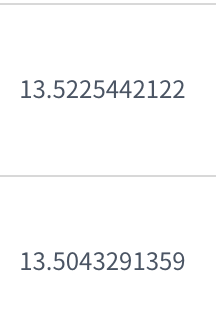